# SVD (Decomposição em Valores Singulares)

Fontes da aula de hoje:
1. Notas de aula do professor Mark Crovella (https://github.com/mcrovella/CS506-Computational-Tools-for-Data-Science)
2. Capítulo 7 do *Livro Data Mining and Machine Learning: Fundamental Concepts and Algorithms* (https://dataminingbook.info/book_html/)

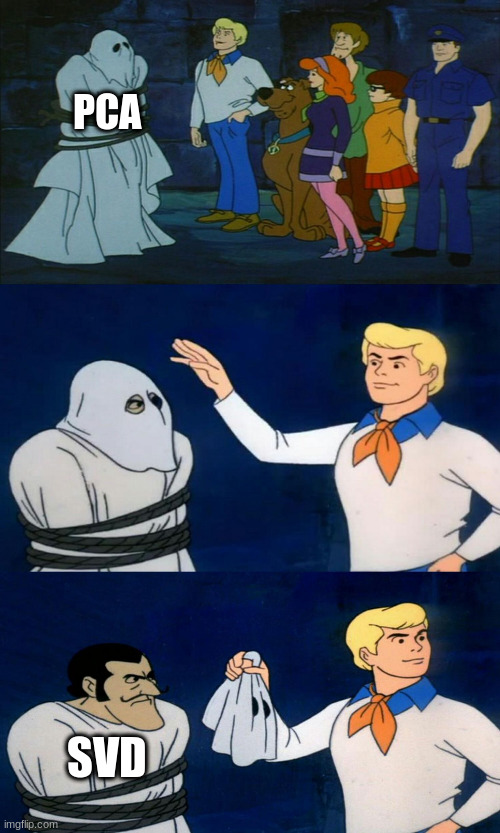

# Preliminares

Como de costume, vamos considerar nosso conjunto de dados como sendo uma matriz real.

$${\mbox{$m$ objetos}}\left\{\begin{array}{c}\;\\\;\\\;\\\;\\\;\end{array}\right.\;\;\overbrace{\left[\begin{array}{ccccc}
\begin{array}{c}x_{11}\\\vdots\\x_{i1}\\\vdots\\x_{m1}\end{array}&
\begin{array}{c}\dots\\\ddots\\\dots\\\ddots\\\dots\end{array}&
\begin{array}{c}x_{1j}\\\vdots\\x_{ij}\\\vdots\\x_{mj}\end{array}&
\begin{array}{c}\dots\\\ddots\\\dots\\\ddots\\\dots\end{array}&
\begin{array}{c}x_{1n}\\\vdots\\x_{in}\\\vdots\\x_{mn}\end{array}
\end{array}\right]}^{\mbox{$n$ features}} = \mathbf{X}$$

## O Rank de uma Matriz

### Definição

Seja $\mathbf{X}$ uma matriz real de $m$ linhas e $n$ colunas.

O __rank__ de $\mathbf{X}$ é a **dimensão do espaço gerado por suas colunas**.

Em outras palavras, o rank de $\mathbf{X}$ é o **menor número de vetores** necessário para **gerar todas** as colunas de $\mathbf{X}$.

- Mais formalmente, o rank de $\mathbf{X}$ é o tamanho do menor conjunto de vetores $\{\mathbf{u}_1, \mathbf{u}_2, \dots, \mathbf{u}_p\}$ tal que toda coluna, $\mathbf{x}_i$, de $\mathbf{X}$ possa ser escrita como:

$$\mathbf{x}_i = v_{i1}\mathbf{u}_1 + v_{i2}\mathbf{u}_2 + \dots + v_{ip}\mathbf{u}_p\;\;\;\;i=1,\dots,n.$$

- O maior valor que o rank de $\mathbf{X}$ pode assumir é $\min(m,n)$.
- No entanto, pode ocorrer que o rank da matriz seja **menor** que $\min(m,n)$.

Da definição acima, veja que se o rank de $\mathbf{X}$ é $k$, então $\mathbf{X}$ pode ser escrita como o produto de duas matrizes, como mostrado abaixo:

$$ \mathbf{X} =
\overbrace{
\left[\begin{array}{cccc}
\vdots&\vdots&&\vdots\\
\mathbf{u}_1&\mathbf{u}_2&\cdots&\mathbf{u}_k\\
\vdots&\vdots&&\vdots\\
\end{array}\right]}^{\large k}
\times
\left[\begin{array}{ccccc}
v_{11}&v_{21}&\dots&v_{n1}\\
v_{12}&v_{22}&\dots&v_{n2}\\
&&\vdots&&\\
v_{1k}&v_{2k}&\dots&v_{nk}
\end{array}\right] = \mathbf{U}\mathbf{V}^T$$

### Quantos valores são necessários para armazenar uma matriz?

- Para armazenar a matriz $\mathbf{X}$, precisamos armazenar $mn$ valores.

- No entanto, se $\mathbf{X}$ tem rank $k$, ela pode ser fatorada como $\mathbf{X} = \mathbf{U}\mathbf{V}^T$,
onde $\mathbf{U} \in \mathbb{R}^{m\times k}$ e $\mathbf{V} \in \mathbb{R}^{n \times k}$.

- Logo, podemos armazenar apenas os fatores acima, o que demanda armazenar apenas $k(m+n)$ valores!

### Exemplos

1. Qual o rank de
$\begin{bmatrix}
    \frac{1}{3} & \frac{1}{3} & \frac{1}{3} \\
    \frac{1}{3} & \frac{1}{3} & \frac{1}{3} \\
    \frac{1}{3} & \frac{1}{3} & \frac{1}{3}
\end{bmatrix}\text{?}$

2. Qual o rank de
$
\begin{bmatrix}
    \frac{1}{3} & 0 & 0 \\
    0 & 1 & 0 \\
    0 & 0 & 2
\end{bmatrix}\text{?}$

3. Qual o rank de
$
\begin{bmatrix}
    1 & 0 & 1 \\
    0 & 1 & 1 \\
    0 & 0 & 0
\end{bmatrix}\text{?}$

4. Qual o rank de
$
\begin{bmatrix}
    1 & 0 & 1 \\
    0 & 1 & 1 \\
    0 & 0 & 10^{-10}
\end{bmatrix}\text{?}$

### Respostas

1. Rank 1. Veja que

$$
\begin{bmatrix}
    \frac{1}{3} & \frac{1}{3} & \frac{1}{3} \\
    \frac{1}{3} & \frac{1}{3} & \frac{1}{3} \\
    \frac{1}{3} & \frac{1}{3} & \frac{1}{3}
\end{bmatrix} =
\begin{bmatrix}
    1 \\
    1 \\
    1
\end{bmatrix}
\times
\begin{bmatrix}
    \frac{1}{3} & \frac{1}{3} & \frac{1}{3}
\end{bmatrix}
$$

2. Rank 3. Veja que
$$
\begin{bmatrix}
    \frac{1}{3} & 0 & 0 \\
    0 & 1 & 0 \\
    0 & 0 & 2
\end{bmatrix}
=
\begin{bmatrix}
    1 & 0 & 0 \\
    0 & 1 & 0 \\
    0 & 0 & 1
\end{bmatrix}
\times
\begin{bmatrix}
    \frac{1}{3} & 0 & 0 \\
    0 & 1 & 0 \\
    0 & 0 & 2
\end{bmatrix}
$$

3. Rank 2. Veja que
$$
\begin{bmatrix}
    1 & 0 & 1 \\
    0 & 1 & 1 \\
    0 & 0 & 0
\end{bmatrix}
=
\begin{bmatrix}
    1 & 0   \\
    0 & 1   \\
    0 & 0  
\end{bmatrix}
\times
\begin{bmatrix}
    1 & 0 & 1 \\
    0 & 1 & 1 \\
\end{bmatrix}
$$

4. Rank 3. Veja que
$$
\begin{bmatrix}
    1 & 0 & 1 \\
    0 & 1 & 1 \\
    0 & 0 & 10^{-10}
\end{bmatrix}
=
\begin{bmatrix}
    1 & 0 & 0 \\
    0 & 1 & 0 \\
    0 & 0 & 1
\end{bmatrix}
\times
\begin{bmatrix}
    1 & 0 & 1 \\
    0 & 1 & 1 \\
    0 & 0 & 10^{-10}
\end{bmatrix}
$$

# Baixo Rank Efetivo

Em muitas situações, nós desejamos **aproximar** uma matriz de dados $\mathbf{X}$ por uma matriz de baixo rank, $\mathbf{X}_k$.

Quando $k < \text{Rank}(\mathbf{X})$, a aproximação de rank $k$ para $\mathbf{X}$ é a matriz de rank $k$ mais próxima de $\mathbf{X}$, i.e.,

$$\mathbf{X}_k =\arg \min_{\{\mathbf{Y}\;|\;\operatorname{Rank}(\mathbf{Y}) = k\}} \Vert \mathbf{X}-\mathbf{Y}\Vert_F.$$

Assuma que temos $\mathbf{X}_k$, uma aproximação de rank $k$ para $\mathbf{X}$.

Pela definição acima, temos que


$$\mathbf{X}_k = \mathbf{U}\mathbf{V}^T$$

para algum conjunto de coeficientes $\mathbf{V}^T$ que descreve combinações lineares de $\mathbf{U}$, que gera as colunas de $\mathbf{X}_k$.

Logo, $\mathbf{U}$ é $m\times k$ e $\mathbf{V}$ é $n\times k$.

Quando aproximamos $\mathbf{X}$ por $\mathbf{X}_k$, o erro obtido é
$$\Vert \mathbf{X}-\mathbf{X}_k\Vert_F.$$

Assim, uma aproximação de rank $k$ é valiosa se
* $\Vert \mathbf{X}-\mathbf{X}_k\Vert_F$ é pequeno, comparado com $\Vert \mathbf{X}\Vert_F$, e
* $k$ é pequeno, comparado com $m$ e $n$.

Nesse caso, tem-se uma simplificação dos dados sem uma perda significativa em acurácia.

## Encontrando Aproximações de Rank $k$

Há um método celebrado para encontrar a melhor aproximação de rank $k$ de uma matriz: SVD (*Singular Value Decomposition*).

> SVD is "the Rolls-Royce and the Swiss Army Knife of Numerical Linear Algebra.”

Dianne O’Leary, MMDS ’06

A decomposição em valores singulares de uma matriz $\mathbf{X}$, de rank $r$, tem a forma

$$\mathbf{X} = \mathbf{U}\mathbf{S} \mathbf{V}^T$$

onde

1. $\mathbf{U}$ é $m\times r$
2. As colunas de $\mathbf{U}$ são mutualmente ortogonais e têm normas unitárias
3. $\mathbf{V}$ é $n\times r$
4. As colunas de $\mathbf{V}$ são mutualmente ortogonais e têm normas unitárias
5. A matriz $\mathbf{S}$ é uma matriz diagonal $r \times r$. Os valores da diagonal são $\sigma_1 \geq \sigma_2 \geq \dots \geq \sigma_r > 0$.

Representação

$$ \left[\begin{array}{cccc}\begin{array}{c}\vdots\\\vdots\\{\bf x_1}\\\vdots\\\vdots\end{array}&\begin{array}{c}\vdots\\\vdots\\{\bf x_2}\\\vdots\\\vdots\end{array}&\dots&\begin{array}{c}\vdots\\\vdots\\{\bf x_n}\\\vdots\\\vdots\end{array}\\\end{array}\right] =
\overbrace{\left[\begin{array}{ccc}
\vdots&&\vdots\\
\vdots&&\vdots\\
\mathbf{u}_1&\cdots&\mathbf{u}_r\\
\vdots&&\vdots\\
\vdots&&\vdots\end{array}\right]}^{\large r}
\times
\left[\begin{array}{ccc}
\sigma_1&~\\
~&\ddots&\\
~&&\sigma_r\\
\end{array}\right]
\times
\left[\begin{array}{ccccc}\dots&\dots&\mathbf{v}_1&\dots&\dots\\
&&\vdots&&\\
\dots&\dots&\mathbf{v}_r&\dots&\dots
\end{array}\right]$$

SVD é útil para encontrar aproximação de matrizes.

Em particular, para uma matriz $m\times n$, $\mathbf{X}$, SVD nos dá duas coisas:
1. A melhor aproximação de rank $k$ de $\mathbf{X}$, para qualquer $1 \le k \le \text{rank}(\mathbf{X})$
2. O erro que está sendo cometido na aproximação.

A melhor aproximação de rank $k$ de $\mathbf{X}$ é formada a partir de
* $\mathbf{U}_k =$ as primeiras $k$ colunas de $\mathbf{U}$
* $\mathbf{S}_k = $ a submatriz superior esquerda $k \times k$ de $\Sigma$
* $\mathbf{V}_k= $ as $k$ primeiras colunas de $\mathbf{V}$.

Com isso, a aproximação é dada por:

$$ \mathbf{X}_k = \mathbf{U}_k\mathbf{S}_k\mathbf{V}_k^T.$$



Além disso, o erro de aproximação (de acordo com a norma de Frobenius) é dado por
$$\Vert\mathbf{X} - \mathbf{X}_k\Vert_F = \sqrt{\sum_{i=k+1}^r\sigma^2_i}.$$

## Baixo Rank Efetivo (na prática)

Quase toda matriz de dados tem rank completo, significando que $\text{Rank}(\mathbf{X}) = \min(m, n)$.

No entanto, é **comum** que matrizes de dados tenham **baixo rank efetivo**.
Significando que é possível aproximar $\mathbf{X}$ por $\mathbf{X}_k$ (rank $k$) de forma que $k \ll \min(m,n)$.

Dada uma matriz, podemos "julgar" se ela tem baixo rank efetivo observando seus valores singulares, uma vez que esses nos informam o erro de aproximação.

### Exemplos e Aplicações

#### Tráfego em redes

Vamos considerar os dados de tráfego na rede Abilene (Fonte: Internet2, circa 2005).

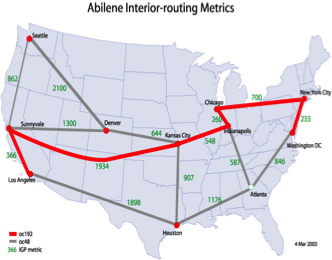

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!rm -rf datasets-minicurso
!git clone https://github.com/gaabrielfranco/datasets-minicurso.git

Cloning into 'datasets-minicurso'...
remote: Enumerating objects: 14407, done.
remote: Total 14407 (delta 0), reused 0 (delta 0), pack-reused 14407
Receiving objects: 100% (14407/14407), 59.52 MiB | 36.08 MiB/s, done.
Resolving deltas: 100% (26/26), done.
Updating files: 100% (14398/14398), done.


In [ ]:
X = pd.read_csv('datasets-minicurso/abilene_traffic.csv', index_col = 0)
X.head()

,ATLA-ATLA,ATLA-CHIN,ATLA-DNVR,ATLA-HSTN,ATLA-IPLS,ATLA-KSCY,ATLA-LOSA,ATLA-NYCM,ATLA-SNVA,ATLA-STTL,...,WASH-CHIN,WASH-DNVR,WASH-HSTN,WASH-IPLS,WASH-KSCY,WASH-LOSA,WASH-NYCM,WASH-SNVA,WASH-STTL,WASH-WASH
2003-09-01 00:00:00,8466132.0,29346537.0,15792104.0,3646187.0,21756443.0,10792818.0,14220940.0,25014340.0,13677284.0,10591345.0,...,53296727.0,18724766.0,12238893.0,52782009.0,12836459.0,31460190.0,105796930.0,13756184.0,13582945.0,120384980.0
2003-09-01 00:10:00,20524567.0,28726106.0,8030109.0,4175817.0,24497174.0,8623734.0,15695839.0,36788680.0,5607086.0,10714795.0,...,68413060.0,28522606.0,11377094.0,60006620.0,12556471.0,32450393.0,70665497.0,13968786.0,16144471.0,135679630.0
2003-09-01 00:20:00,12864863.0,27630217.0,7417228.0,5337471.0,23254392.0,7882377.0,16176022.0,31682355.0,6354657.0,12205515.0,...,67969461.0,37073856.0,15680615.0,61484233.0,16318506.0,33768245.0,71577084.0,13938533.0,14959708.0,126175780.0
2003-09-01 00:30:00,10856263.0,32243146.0,7136130.0,3695059.0,28747761.0,9102603.0,16200072.0,27472465.0,9402609.0,10934084.0,...,66616097.0,43019246.0,12726958.0,64027333.0,16394673.0,33440318.0,79682647.0,16212806.0,16425845.0,112891500.0
2003-09-01 00:40:00,10068533.0,30164311.0,8061482.0,2922271.0,35642229.0,9104036.0,12279530.0,29171205.0,7624924.0,11327807.0,...,66797282.0,40408580.0,11733121.0,54541962.0,16769259.0,33927515.0,81480788.0,16757707.0,15158825.0,123140310.0


In [ ]:
X.shape

(1008, 121)

Como esperado, a matriz de tráfego tem rank completo (i.e., 121).

In [ ]:
np.linalg.matrix_rank(X)

121

No entanto, talvez, ela tenha **baixo rank efetivo**.

Vamos obter a decomposição em valores singulares de $\mathbf{X}$.

In [ ]:
u, s, vt = np.linalg.svd(X)

Vamos olhar os valores singulares da matriz.

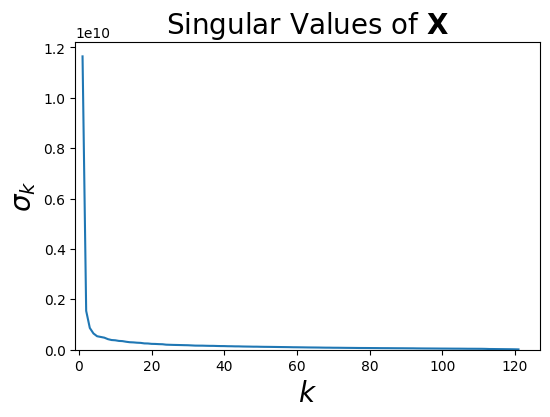

In [ ]:
fig = plt.figure(figsize=(6,4))
plt.plot(range(1,1+len(s)),s)
plt.xlabel(r'$k$',size=20)
plt.ylabel(r'$\sigma_k$',size=20)
plt.ylim(ymin = 0)
plt.xlim(xmin = -1)
plt.title(r'Singular Values of $\mathbf{X}$',size=20);

Observando apenas os valores pequenos de $k$, pode-se perceber que o "cotovelo" da curva está na região de 4 - 6 valores singulares.

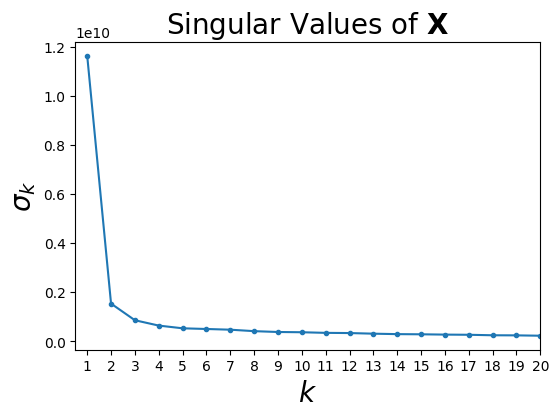

In [ ]:
fig = plt.figure(figsize = (6, 4))
plt.plot(range(1, 21), s[0:20], '.-')
plt.xlim([0.5, 20])
plt.xlabel(r'$k$', size=20)
plt.xticks(range(1, 21))
plt.ylabel(r'$\sigma_k$', size=20);
plt.title(r'Singular Values of $\mathbf{X}$',size=20);

Esse padrão de valores singulares sugere **baixo rank efetivo**.

Vamos observar o erro de aproximação de rank $k$ para diversos valores de $k$.

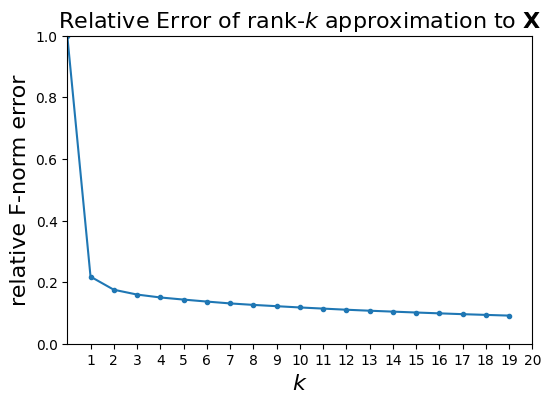

In [ ]:
fig = plt.figure(figsize = (6, 4))
Anorm = np.linalg.norm(X)
err = np.cumsum(s[::-1]**2)
err = np.sqrt(err[::-1])
plt.plot(range(0, 20), err[:20]/Anorm, '.-')
plt.xlim([0, 20])
plt.ylim([0, 1])
plt.xticks(range(1, 21))
plt.xlabel(r'$k$', size = 16)
plt.ylabel(r'relative F-norm error', size=16)
plt.title(r'Relative Error of rank-$k$ approximation to $\mathbf{X}$', size=16);

Interessantemente, com uma aproximação de rank 20, tem-se apenas 9% de erro.

Mas, ao invés de armazenar

* $mn =$ (1008 $\cdot$ 121) = 121,968 valores,

teríamos que armazenar apenas

* $k(m+n)$ = 20 $\cdot$ (1008 + 121) = 22,580 valores,

o que é uma redução de 81%.

#### Preferência de usuários sobre itens

Exemplo: Desafio Netflix para recomendação de filmes a partir de uma matriz parcialmente observada.

$$\left[\begin{array}{ccccccc}
  ~&~&~&\vdots&~&~&~\\
  &~&3&2&~&1&\\
  &1&~&1&~&~&\\
  \dots&~&2&~&4&~&\dots\\
  &5&5&~&4&~&\\
  &1&~&~&1&5&\\
  ~&~&~&\vdots&~&~&~\\
\end{array}
\right]
$$

Onde as linhas correspondem aos usuários, as colunas aos filmes e as entradas são avaliações.

Embora a matriz do problema tenha tamanho 500,000 $\times$ 18,000, a abordagem vencedora modelou a matriz como tendo um **rank entre 20 e 40**.

Fonte: [Koren et al, IEEE Computer, 2009]

#### Imagens

Imagens comumente têm baixo rank efetivo.

Considere a foto original abaixo:

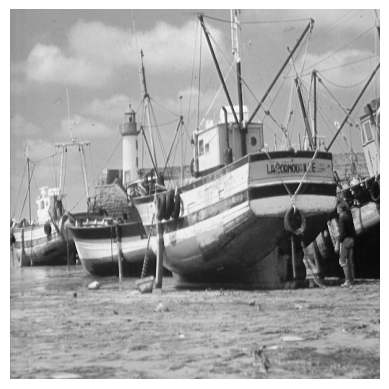

In [ ]:
boat = np.loadtxt('datasets-minicurso/boat.dat')
import matplotlib.cm as cm
plt.figure()
plt.imshow(boat,cmap = cm.Greys_r)
plt.axis('off');

Vamos utilizar SVD

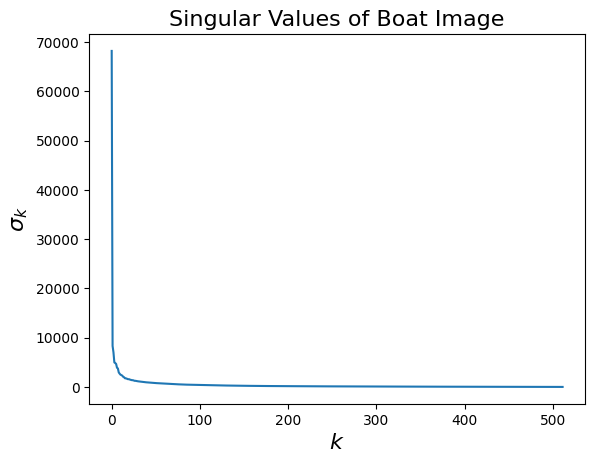

In [ ]:
u, s, vt = np.linalg.svd(boat, full_matrices = False)
plt.plot(s)
plt.xlabel('$k$', size = 16)
plt.ylabel(r'$\sigma_k$', size = 16)
plt.title('Singular Values of Boat Image', size = 16);

Essa imagem é 512 $\times$ 512.  Como uma matriz, ela tem rank 512.

Mas seu rank efetivo é baixo.

Tomando a figura acima como base, o rank efetivo da matriz é aproximadamente 40.

Vamos computar a aproximação de rank 40 e observar a imagem resultante.

In [ ]:
r = 10

u, s, vt = np.linalg.svd(boat, full_matrices = False)
s[r:] = 0
boatApprox = u @ np.diag(s) @ vt

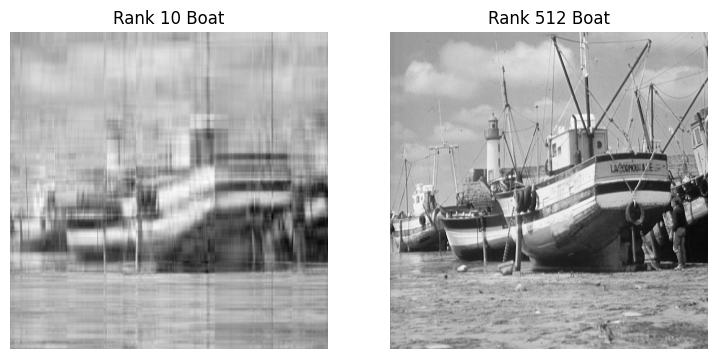

In [ ]:
plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(boatApprox,cmap = cm.Greys_r)
plt.axis('off')
plt.title('Rank ' + str(r) + ' Boat')
plt.subplot(1,2,2)
plt.imshow(boat,cmap = cm.Greys_r)
plt.axis('off')
plt.title('Rank 512 Boat');

# PCA via SVD

## Revisão

O objetivo é encontrar as direções ortogonais que capturam a maior quantidade de variância dos dados.

**Entrada:**
1. Matriz de dados $\mathbf{X} \in \mathbb{R}^{n \times d}$
2. $0 \le \alpha \le 1$, fração da variância total a ser considerada

**Passos:**
1. $\mathbf{Z} \leftarrow$ matriz $\mathbf{X}$ após centralização/pré-processamento
2. $\Sigma \leftarrow \frac{\mathbf{Z}^T\mathbf{Z}}{n}$
3. $\lambda_1, \dots, \lambda_d \leftarrow$ autovalores de $\Sigma$ ordenados decrescentemente
4. $\mathbf{p}_1, \dots, \mathbf{p}_d \leftarrow$ autovetores de $\Sigma$ ($\mathbf{p_i}$ está associado a $\lambda_i$)
5. $f(k) \leftarrow \frac{\sum_{i=1}^k\lambda_i}{\sum_{i=1}^d\lambda_i}$, para $k = 1, \dots, d$
6. Escolha o menor $k$ tal que $f(k) \ge \alpha$
7. $\mathbf{P}_k \leftarrow$ matriz cujas colunas são $\mathbf{p}_1, \dots, \mathbf{p}_k$

**Saída:**
1. Retorne $\mathbf{Z}\mathbf{P}_k$


## Como SVD pode ajudar?

Suponha que tenhamos a decompoisção em valores singulares de $\mathbf{Z}$.

Logo,
$$\mathbf{Z} = \mathbf{U}\mathbf{S}\mathbf{V}^T.$$

Assim,
\begin{align}
\frac{1}{n}\mathbf{Z}^T\mathbf{Z}
& = \frac{1}{n}(\mathbf{U}\mathbf{S}\mathbf{V}^T)^T(\mathbf{U}\mathbf{S}\mathbf{V}^T) \\
& = \frac{1}{n}\mathbf{V}\mathbf{S}^T\mathbf{U}^T\mathbf{U}\mathbf{S}\mathbf{V}^T \\
& = \frac{1}{n}\mathbf{V}\mathbf{S}\mathbf{S}\mathbf{V}^T
\\
& = \frac{1}{n}\mathbf{V}\mathbf{S}^2\mathbf{V}^T \\
& = \mathbf{V}\left(\frac{\mathbf{S}^2}{n}\right)\mathbf{V}^T. \\
\end{align}

Veja que o resultado da última expressão é a diagonalização da matriz $\frac{1}{n}\mathbf{Z}^T\mathbf{Z}$. Como o teorema espectral garante que essa diagonalização é única, temos que:
- As colunas de $\mathbf{V}$ são as componentes principais
- A variância ao longo da $i$-ésima componente é $\lambda_i = \frac{\sigma_i^2}{n}$.

## Para quem não acredita

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
import pandas as pd

X, y = load_wine(return_X_y=True, as_frame = True);

scaler = StandardScaler(with_mean=True, with_std=True)
X[X.columns] = scaler.fit_transform(X)

n, d = X.shape

X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [ ]:
pca = PCA(n_components = 13)
pca.fit(X.values);

# variância ao longo de cada componente
pca.explained_variance_

array([4.73243698, 2.51108093, 1.45424187, 0.92416587, 0.85804868,
       0.64528221, 0.55414147, 0.35046627, 0.29051203, 0.25232001,
       0.22706428, 0.16972374, 0.10396199])

In [ ]:
# primeira componente principal
pca.components_[0]

array([ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
        0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
        0.29671456,  0.37616741,  0.28675223])

In [ ]:
# fazendo SVD
u, s, vt = np.linalg.svd(X, full_matrices = False)

# variância ao longo de cada componente
s * s / n

array([4.70585025, 2.49697373, 1.44607197, 0.91897392, 0.85322818,
       0.64165703, 0.55102831, 0.34849736, 0.28887994, 0.25090248,
       0.22578864, 0.16877023, 0.10337794])

In [ ]:
# primeira componente principal
vt[0,:]

array([-0.1443294 ,  0.24518758,  0.00205106,  0.23932041, -0.14199204,
       -0.39466085, -0.4229343 ,  0.2985331 , -0.31342949,  0.0886167 ,
       -0.29671456, -0.37616741, -0.28675223])

# What is next?

1. SVD pode ser utilizado como um técnica poderosa para minerar anomalias. Exemplo clássico https://dl.acm.org/doi/abs/10.1145/1090191.1080118 (leitura mais avançada).